In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Uploading the test and training data files on google colab.

In [2]:
uploaded = files.upload()

Saving training_features - Copy.csv to training_features - Copy.csv


In [3]:
uploaded_test = files.upload()

Saving test_features - Copy.csv to test_features - Copy.csv


In [4]:
training_data = pd.read_csv('training_features - Copy.csv')
test_data = pd.read_csv('test_features - Copy.csv')

# Correlation Heatmap between features.

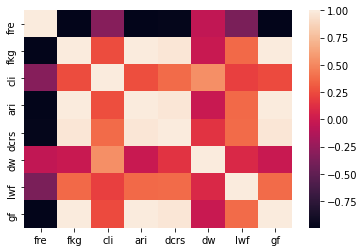

In [5]:
# Readability feature group heatmap
df = training_data.iloc[:, 4:12]

# Word Level feature group heatmap
# df = training_data.iloc[:, 12:19]

# Error feature group heatmap
# df = training_data.iloc[:, 19:24]

# POS feature group heatmap
# df = training_data.iloc[:, 24:53]

# Syntactic feature group heatmap
# df = training_data.iloc[:, 53:66]

# Discourse feature group heatmap
# df = training_data.iloc[:, 66:]
sns.heatmap(df.corr());

# Separating feature group and target variables.

In [6]:
# Readability feature group
X_train = training_data.iloc[:, 4:12].values
Y_train = training_data.iloc[:, 2].values
X_test = test_data.iloc[:, 4:12].values
Y_test = test_data.iloc[:, 2].values

# Word Level feature group
# X_train = training_data.iloc[:, 12:19].values
# Y_train = training_data.iloc[:, 2].values
# X_test = test_data.iloc[:, 12:19].values
# Y_test = test_data.iloc[:, 2].values

# Error feature group
# X_train = training_data.iloc[:, 19:24].values
# Y_train = training_data.iloc[:, 2].values
# X_test = test_data.iloc[:, 19:24].values
# Y_test = test_data.iloc[:, 2].values

# POS feature group
# X_train = training_data.iloc[:, 24:53].values
# Y_train = training_data.iloc[:, 2].values
# X_test = test_data.iloc[:, 24:53].values
# Y_test = test_data.iloc[:, 2].values

# Syntactic feature group
# X_train = training_data.iloc[:, 53:66].values
# Y_train = training_data.iloc[:, 2].values
# X_test = test_data.iloc[:, 53:66].values
# Y_test = test_data.iloc[:, 2].values

# Discourse feature group
# X_train = training_data.iloc[:, 66:].values
# Y_train = training_data.iloc[:, 2].values
# X_test = test_data.iloc[:, 66:].values
# Y_test = test_data.iloc[:, 2].values

### Standardising Data

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Principal Component Analysis (PCA)

In [8]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Ridge Regression

In [9]:
regressor = Ridge(alpha=0.11)
regressor.fit(X_train, Y_train) 

Ridge(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
y_pred = regressor.predict(X_train)
y_pred = np.rint(y_pred)
print('Training RMSE',np.sqrt(((y_pred - Y_train) ** 2).mean()))
print('Training MAE', mean_absolute_error(Y_train, y_pred.flatten()))

Training RMSE 5.150070411267855
Training MAE 4.083260297984224


In [11]:
y_pred = regressor.predict(X_test)
y_pred = np.rint(y_pred)
print('Test RMSE',np.sqrt(((y_pred - Y_test) ** 2).mean()))
print('Test MAE', mean_absolute_error(Y_test, y_pred.flatten()))
corr, _ = pearsonr(y_pred.flatten(), Y_test)
print('Pearsons correlation: %.3f' % corr)

Test RMSE 5.6449959593823715
Test MAE 4.463917525773196
Pearsons correlation: 0.301
